## 타겟 데이터
- 와인의 종류 0, 1, 2의 세가지 값

## 특징 데이터

- 알콜(Alcohol)
- 말산(Malic acid)
- 회분(Ash)
- 회분의 알칼리도(Alcalinity of ash)
- 마그네슘(Magnesium)
- 총 폴리페놀(Total phenols)
- 플라보노이드 폴리페놀(Flavanoids)
- 비 플라보노이드 폴리페놀(Nonflavanoid phenols)
- 프로안토시아닌(Proanthocyanins)
- 색상의 강도(Color intensity)
- 색상(Hue)
- 희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines)
- 프롤린(Proline)

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils, losses, optimizers, metrics, initializers
from sklearn import datasets, model_selection
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
wine_data = datasets.load_wine()

In [2]:
target = wine_data['target']

In [3]:
data = wine_data['data']

In [21]:
df = pd.DataFrame(data)
df = df.drop(columns=12)

In [5]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [22]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(df, target, test_size=0.2, random_state=42)

In [23]:
print(x_train.shape)
print(x_test.shape)

(142, 12)
(36, 12)


In [24]:
print(y_train.shape)
print(y_test.shape)

(142,)
(36,)


In [25]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [26]:
print(y_train.shape)
print(y_test.shape)

(142, 3)
(36, 3)


In [27]:
model = models.Sequential()
model.add(layers.Dense(input_dim=data.shape[1], units=256, activation=None, kernel_initializer=initializers.he_uniform()))
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.3))

model.add(layers.Dense(units=3, activation='softmax')) # Apply softmax function on model's output

In [28]:
model.compile(optimizer=optimizers.Adam(0.001), 
              loss=losses.categorical_crossentropy, # See other available losses @ https://keras.io/losses/
              metrics=[metrics.Accuracy(), metrics.Recall(), metrics.Precision()]) # TF 2.X 에서 Precision / Recall / F1-Score 적용하기 @ https://j.mp/3cf3lbi

In [32]:
history = model.fit(x_train, y_train, batch_size=10, epochs=15, validation_split=0.2)

Epoch 1/15


ValueError: in user code:

    File "C:\Users\나\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\나\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\나\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\나\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\나\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\나\AppData\Roaming\Python\Python310\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 13), found shape=(None, 12)


In [14]:
result = model.evaluate(x_test, y_test, batch_size=10)

4/4 [==============================] - 0s 3ms/step - loss: 1.3153 - accuracy: 0.0648 - recall: 0.7222 - precision: 0.7222


In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'recall', 'precision', 'val_loss', 'val_accuracy', 'val_recall', 'val_precision'])

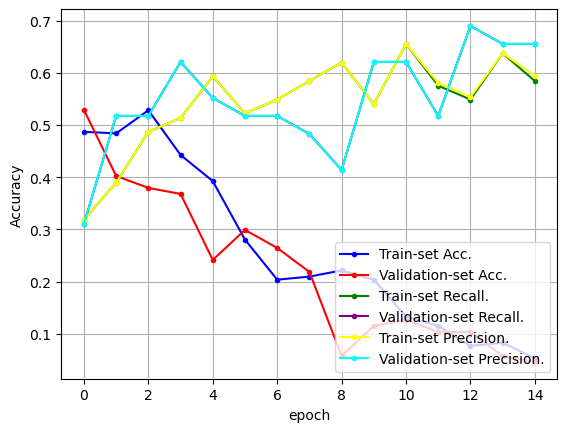

In [16]:
val_acc = history.history['val_accuracy']
acc = history.history['accuracy']

val_recall = history.history['val_recall']
recall = history.history['recall']

val_precision = history.history['val_precision']
precision = history.history['precision']

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

x_len = np.arange(len(recall))
plt.plot(x_len, recall, marker='.', c='green', label="Train-set Recall.")
plt.plot(x_len, val_recall, marker='.', c='purple', label="Validation-set Recall.")

x_len = np.arange(len(precision))
plt.plot(x_len, precision, marker='.', c='yellow', label="Train-set Precision.")
plt.plot(x_len, val_precision, marker='.', c='cyan', label="Validation-set Precision.")

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

In [17]:
model.predict(x_test)
np.argmax(model.predict(x_test), axis=1)

2/2 [==============================] - 0s 3ms/step


array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [18]:
sample_data = np.array([[14.23, 1.71, 2.43, 15.6, 127.0, 2.80, 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065.0]])
model.predict(sample_data)
np.argmax(model.predict(sample_data), axis=1)

1/1 [==============================] - 0s 17ms/step


array([1], dtype=int64)